# Imports & reading Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("heart_disease_data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# data description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# data analysis

<AxesSubplot:>

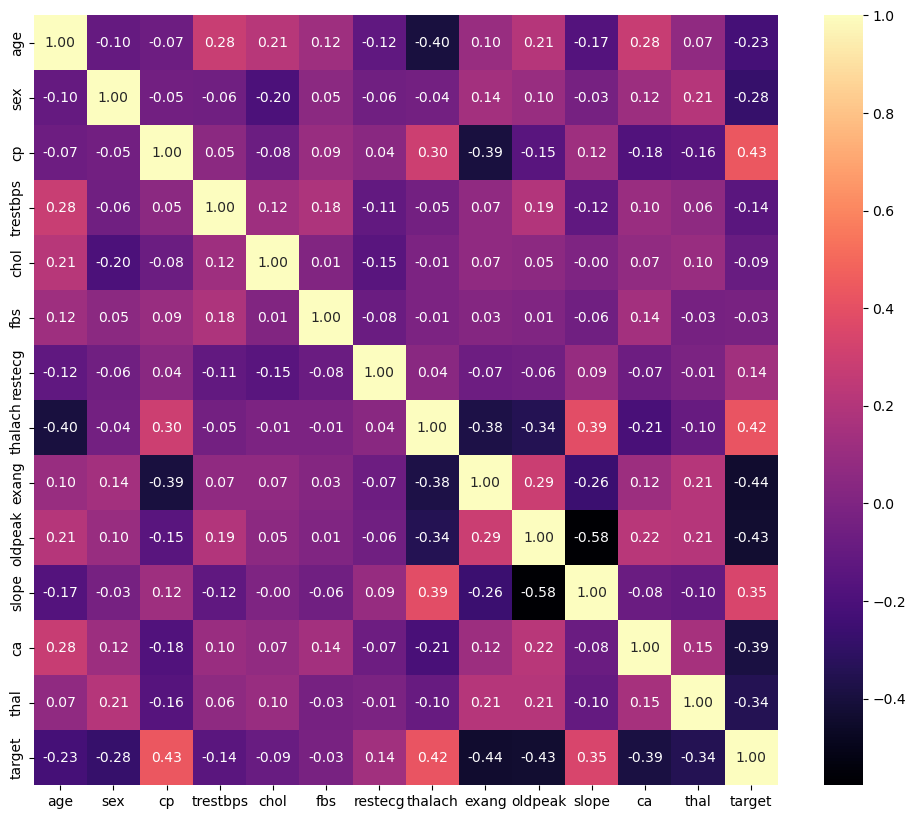

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='magma',fmt='.2f')

In [8]:
for i in data.columns:
    print(i,len(data[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


# Data visualization

In [9]:
data2 = data.copy()

In [10]:
def change_sex(sex):
    if sex==0:
        return 'female'
    else:
        return 'male'
data2['sex']= data['sex'].apply(change_sex)

In [11]:
def change_target(prob):
    if prob==0:
        return 'heart disease'
    else:
        return 'No heart disease'
data2['target']= data['target'].apply(change_target)    

Text(0.5, 1.0, 'gender v/s target\n')

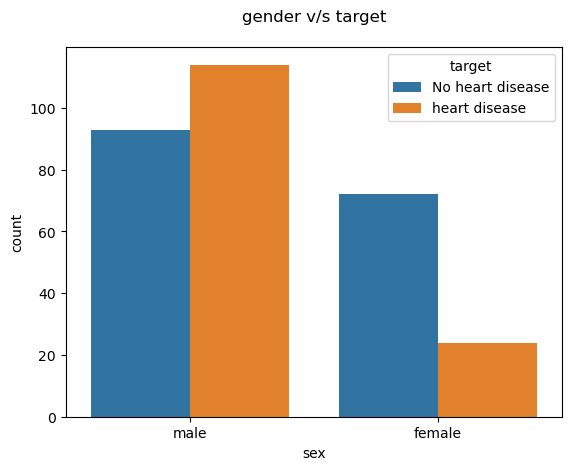

In [12]:
sns.countplot(data=data2,x='sex',hue='target')
plt.title('gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

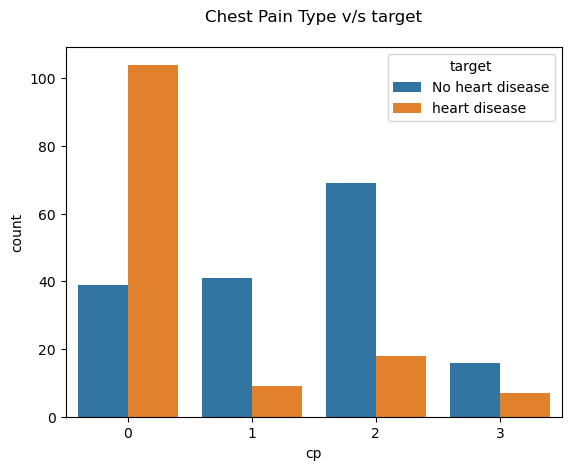

In [13]:
sns.countplot(data= data2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

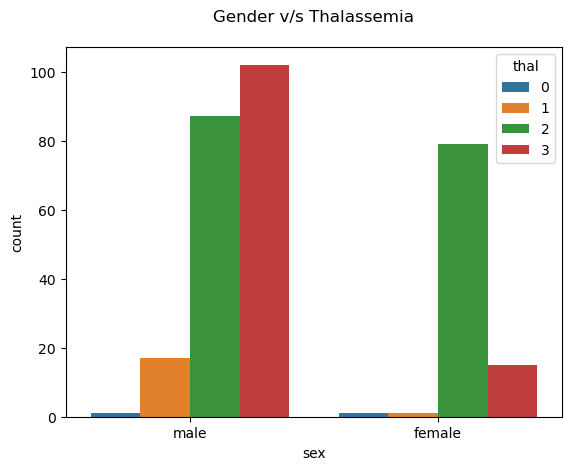

In [14]:
sns.countplot(data= data2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')

Text(0.5, 1.0, 'Slope v/s Target\n')

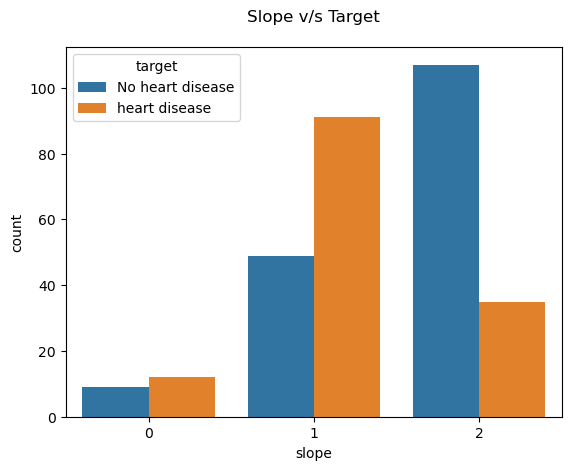

In [15]:
sns.countplot(data= data2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

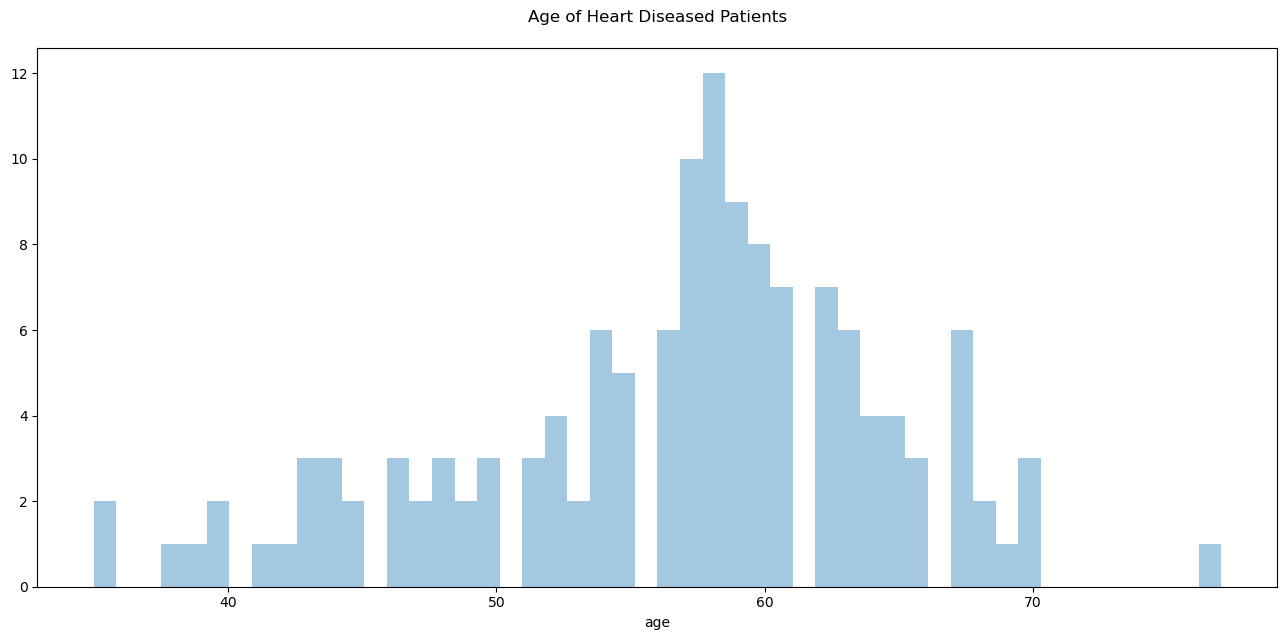

In [16]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

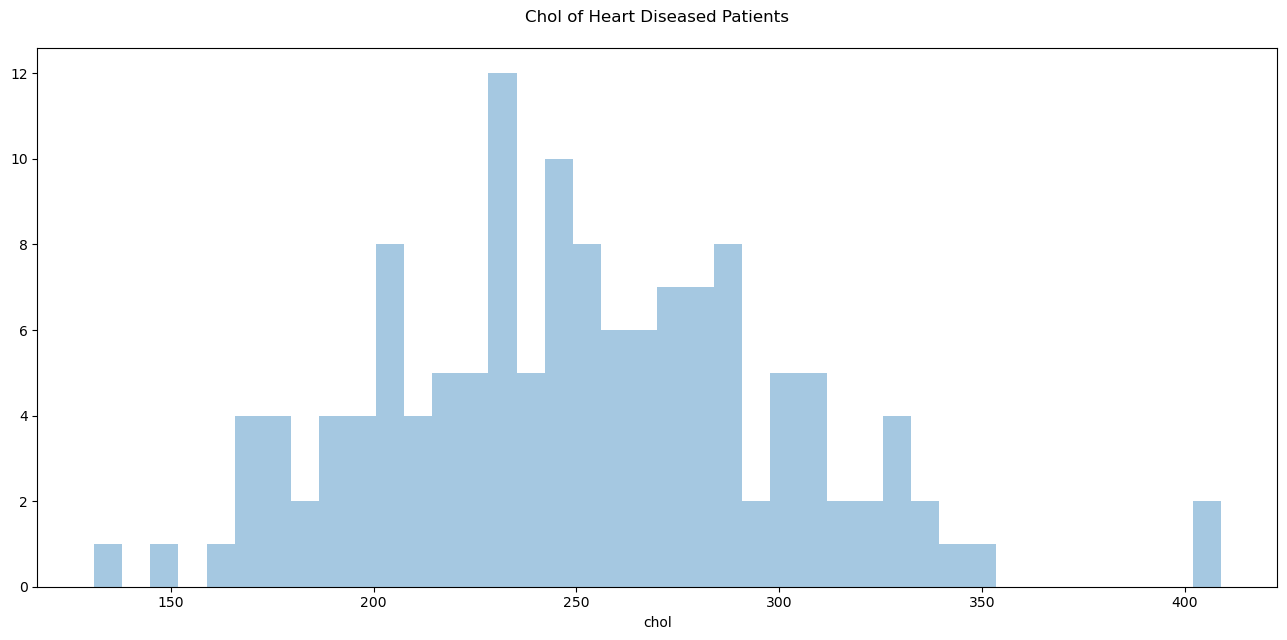

In [17]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

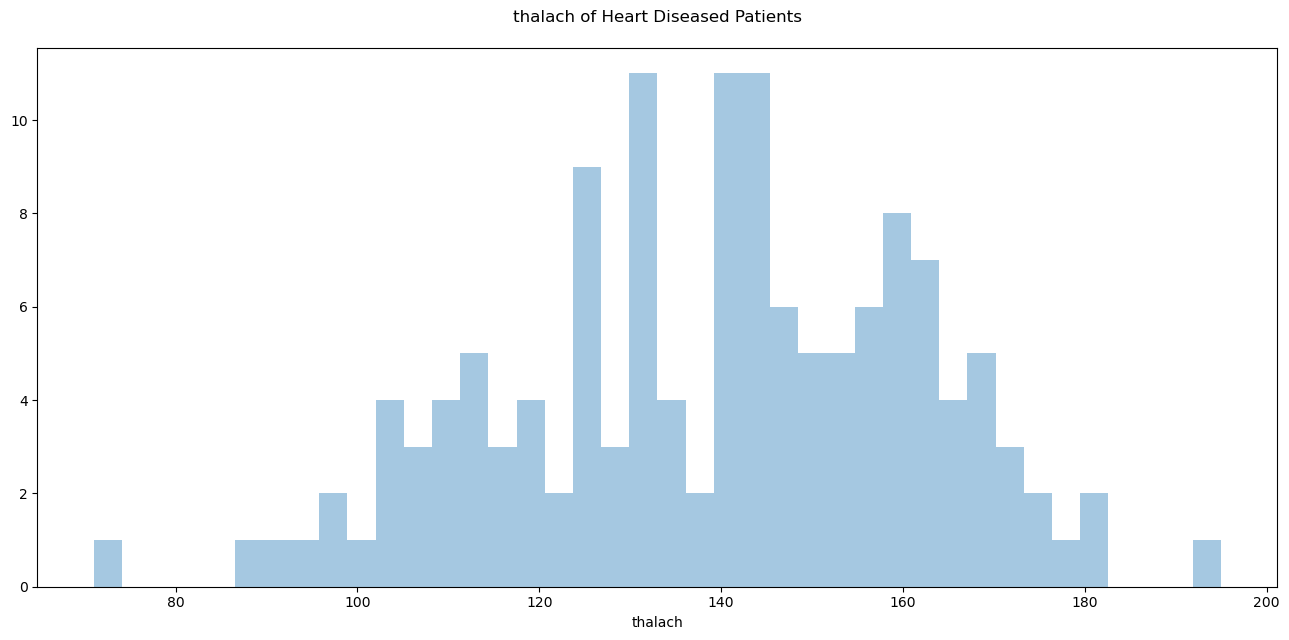

In [18]:
plt.figure(figsize=(16,7))
sns.distplot(data[data['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

In [19]:
# data 3 contains only HEART DISEASED PATIENTS
data3 = data[data['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]


Age vs trestbps(Heart Diseased Patinets)


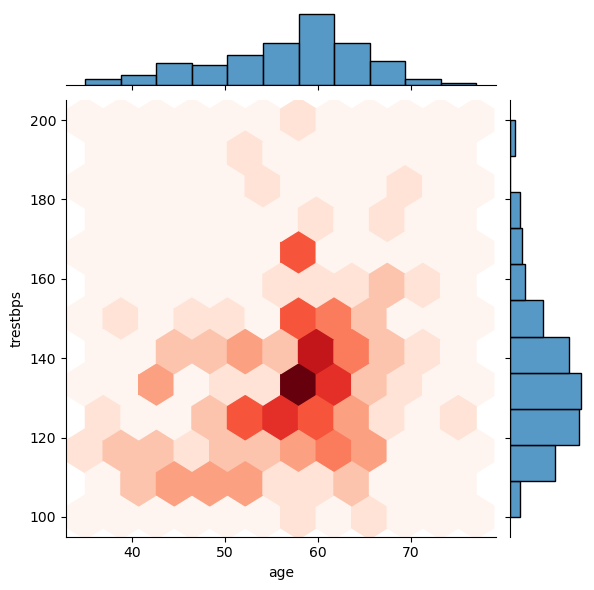

In [20]:
# joint plot
pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=data3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
           
              )

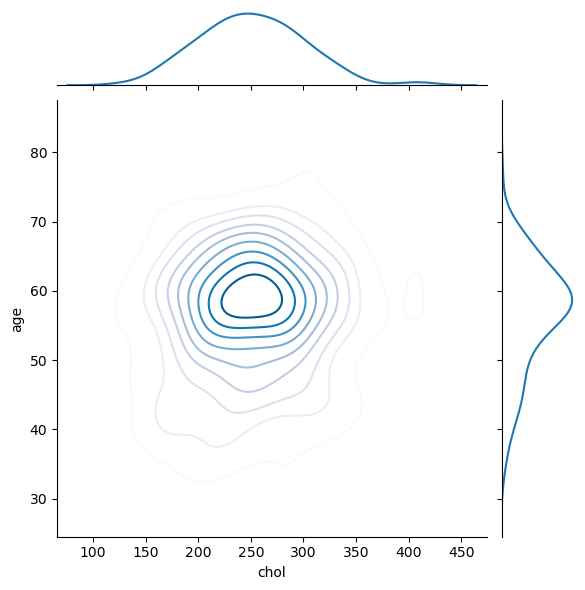

In [21]:
sns.jointplot(data=data3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

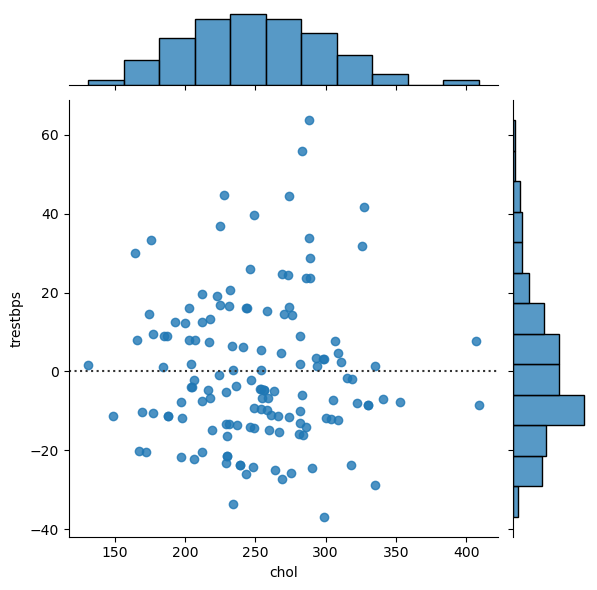

In [22]:
sns.jointplot(data=data3,
              x='chol',
              y='trestbps',
              kind='resid',
             
              )

# data preprocessing

In [23]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [24]:
#cp - chest_pain_type
data.loc[data['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
data.loc[data['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
data.loc[data['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
data.loc[data['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
data.loc[data['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
data.loc[data['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
data.loc[data['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
data.loc[data['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
data.loc[data['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
data.loc[data['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
data.loc[data['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
data.loc[data['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
data.loc[data['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
data.loc[data['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'


In [25]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,downsloping,0,fixed defect,1
1,37,1,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0,normal,1
2,41,0,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,upsloping,0,normal,1
3,56,1,atypical angina,120,236,0,normal,178,0,0.8,upsloping,0,normal,1
4,57,0,asymptomatic,120,354,0,normal,163,1,0.6,upsloping,0,normal,1


# one hotcoding

In [26]:
df = pd.get_dummies(data,drop_first=False)
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [27]:
df_temp = df['thalassemia_type_fixed defect']

In [28]:
df = pd.get_dummies(data,drop_first=True)

In [29]:
df.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,1,0,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,1,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,1,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,1,0,1,1,0,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,1,1,0,0


In [30]:
frames = [df,df_temp]
result = pd.concat(frames,axis=1)
result.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,1,0,0,0,0,0,0,1
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,1,0,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,1,1,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,0,1,0,1,1,0,0,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,0,1,0,1,1,0,0,0


In [31]:
result.drop('thalassemia_type_nothing',axis=1,inplace=True)
resultc=result.copy()

# Logistic Regression

In [32]:
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_normal', 'thalassemia_type_reversable defect',
       'thalassemia_type_fixed defect'],
      dtype='object')

In [33]:
X= result.drop('target',axis=1)

In [34]:
y=result['target']

In [35]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [36]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)
X_test.head(11)


,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_reversable defect,thalassemia_type_fixed defect
225,70,1,145,174,0,125,1,2.6,0,0,0,0,0,1,0,0,0,1,0
152,64,1,170,227,0,155,0,0.6,0,0,0,1,1,0,1,0,0,1,0
228,59,1,170,288,0,159,0,0.2,0,0,0,1,1,0,1,0,0,1,0
201,60,1,125,258,0,141,1,2.8,1,0,0,0,1,0,1,0,0,1,0
52,62,1,130,231,0,146,0,1.8,3,0,1,0,0,1,1,0,0,1,0
245,48,1,124,274,0,166,0,0.5,0,0,0,0,1,0,1,0,0,1,0
175,40,1,110,167,0,114,1,2.0,0,0,0,0,1,0,1,0,0,1,0
168,63,1,130,254,0,147,0,1.4,1,0,0,0,1,0,1,0,0,1,0
223,56,0,200,288,1,133,1,4.0,2,0,0,0,1,0,0,0,0,1,0
217,63,1,130,330,1,132,1,1.8,3,0,0,0,1,0,0,1,0,1,0


In [37]:
y_pred = logre.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [38]:
X_test.head(11)


,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_reversable defect,thalassemia_type_fixed defect
225,70,1,145,174,0,125,1,2.6,0,0,0,0,0,1,0,0,0,1,0
152,64,1,170,227,0,155,0,0.6,0,0,0,1,1,0,1,0,0,1,0
228,59,1,170,288,0,159,0,0.2,0,0,0,1,1,0,1,0,0,1,0
201,60,1,125,258,0,141,1,2.8,1,0,0,0,1,0,1,0,0,1,0
52,62,1,130,231,0,146,0,1.8,3,0,1,0,0,1,1,0,0,1,0
245,48,1,124,274,0,166,0,0.5,0,0,0,0,1,0,1,0,0,1,0
175,40,1,110,167,0,114,1,2.0,0,0,0,0,1,0,1,0,0,1,0
168,63,1,130,254,0,147,0,1.4,1,0,0,0,1,0,1,0,0,1,0
223,56,0,200,288,1,133,1,4.0,2,0,0,0,1,0,0,0,0,1,0
217,63,1,130,330,1,132,1,1.8,3,0,0,0,1,0,0,1,0,1,0


In [39]:
from sklearn.metrics import accuracy_score
accuracy_log_reg = accuracy_score(y_test,y_pred)
# print()

In [40]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_pred_decision_tree = decision_tree.predict(X_test)


decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy: ", decision_tree_accuracy)

Decision Tree Accuracy:  0.7213114754098361


In [41]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

y_pred_random_forest = random_forest.predict(X_test)


random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest Accuracy: ", random_forest_accuracy)

Random Forest Accuracy:  0.8360655737704918


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

y_pred_linear_regression = linear_regression.predict(X_test)

mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
r2_linear_regression = r2_score(y_test, y_pred_linear_regression)

print("Linear Regression Mean Squared Error: ", mse_linear_regression)
print("Linear Regression R-squared: ", r2_linear_regression)


Linear Regression Mean Squared Error:  0.12293034643610054
Linear Regression R-squared:  0.5017169726702286


In [43]:
accuracy_values = {
    "Linear Regression (R²)": r2_linear_regression,
    "Logistic Regression": accuracy_log_reg,
    "Decision Tree": decision_tree_accuracy,
    "Random Forest":random_forest_accuracy
}

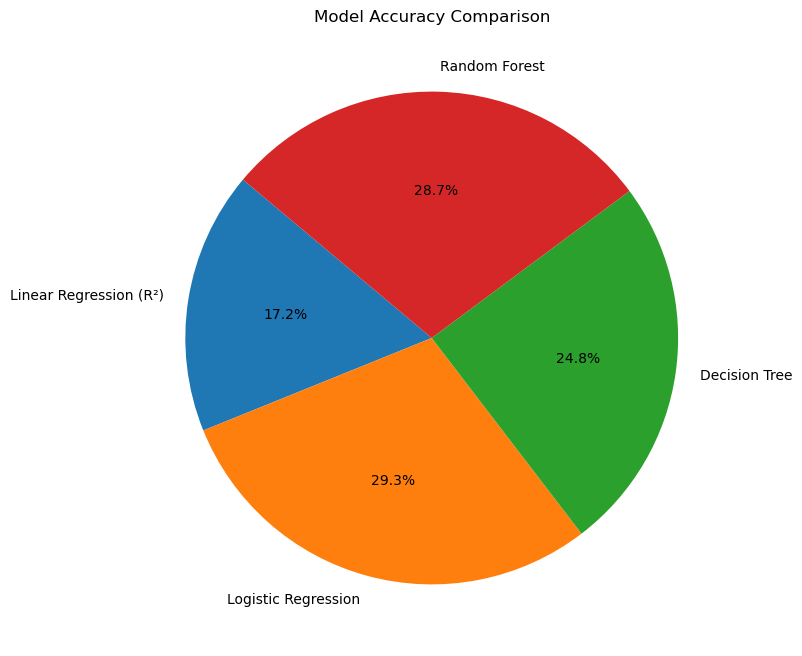

In [44]:
labels = list(accuracy_values.keys())
sizes = list(accuracy_values.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Model Accuracy Comparison')
plt.show()